In [1]:
from IPython.display import display, HTML

display(
    HTML("""
<style>
* {font-family:D2Coding;}
div.container{width:87% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input { font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:3px;}
table.dataframe{font-size:12px;}
</style>b
"""))

<font size=5 color=red>01_머신러닝입문-Linear regression</font>
# 1. 기존의 프로그램 방식
- 회귀분석(linear regression) 설명 사이트 : 
https://gbhat.com/machine_learning/linear_regression.html
- 오차함수 : MSE(오차제곱평균), RMSE(루트를 취하기 때문에 MSE의 단점이 어 
느정도 해소. 이상치에 덜 민감), MAE(mean absolute erro error ; 절대값평균)  
-https://jysden.medium.com/%EC%96%B8%EC%A0%9C-mse-mae-rmse%EB%A5%BC-%EC%82%AC%EC%9A%A9%ED%95%98%EB%8A%94%EA%B0%80-c473bd831c62
![image](https://miro.medium.com/v2/resize:fit:720/format:webp/1*XRXgMqrr5rq-V1rW7SkrtA.png)
- 경사하강법 설명
    - https://www.mql5.com/ko/articles/11200

In [6]:
import sys
sys.version

'3.9.23 (main, Jun  5 2025, 08:23:30) \n[Clang 14.0.6 ]'

In [2]:
# 섭씨온도를 화씨온도를 출력
def celsius_to_fathercnhelt(c):
    return c * 1.8 + 32

In [3]:
input_c = int(input('섭씨온도 ? '))
print('화씨온도는 ', celsius_to_fathercnhelt(input_c))

섭씨온도 ? 1
화씨온도는  33.8


# 2. 머신러닝 프로그램 방식


```
전에 결측치 처리 등을 마무리 한 다음

1. 데이터 확보 및 생성
2. 데이터 전처리 : 
   스케일 조정
   훈련데이터 (학습데이터셋), 검증데이터셋, 시험데이터셋로 분할
3. 모델 구성
4. 모델 학습과정 설정
5. 모델 학습 시키기
6. 모델 평가 (시험데이터셋으로)
   <모델 저장 - 안하면, 3번 ~ 4번를 해야 함>
7. 모델 저장 및 사용 (입력값이 주어지면, 예측값 받기) 
```

## 2.1. 노이즈가 없는 데이터로 실습

In [76]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# 1. 데이터 확보 및 생성
data_C = np.arange(100) # 0 ~ 100
data_C # 독립변수(입력변수)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [15]:
data_F = celsius_to_fathercnhelt(data_C)
data_F # 종속변수(타켓변수, 출력변수)

array([ 32. ,  33.8,  35.6,  37.4,  39.2,  41. ,  42.8,  44.6,  46.4,
        48.2,  50. ,  51.8,  53.6,  55.4,  57.2,  59. ,  60.8,  62.6,
        64.4,  66.2,  68. ,  69.8,  71.6,  73.4,  75.2,  77. ,  78.8,
        80.6,  82.4,  84.2,  86. ,  87.8,  89.6,  91.4,  93.2,  95. ,
        96.8,  98.6, 100.4, 102.2, 104. , 105.8, 107.6, 109.4, 111.2,
       113. , 114.8, 116.6, 118.4, 120.2, 122. , 123.8, 125.6, 127.4,
       129.2, 131. , 132.8, 134.6, 136.4, 138.2, 140. , 141.8, 143.6,
       145.4, 147.2, 149. , 150.8, 152.6, 154.4, 156.2, 158. , 159.8,
       161.6, 163.4, 165.2, 167. , 168.8, 170.6, 172.4, 174.2, 176. ,
       177.8, 179.6, 181.4, 183.2, 185. , 186.8, 188.6, 190.4, 192.2,
       194. , 195.8, 197.6, 199.4, 201.2, 203. , 204.8, 206.6, 208.4,
       210.2])

In [18]:
# 2. 데이터 전처리 : 컴퓨터에게 학습시키기 위해 스케일 조정
scaled_data_C = data_C /100.0
scaled_data_F = data_F / 100.0
print('학습시 독립변수 :', scaled_data_C)
print('학습시 타켓변수 :', scaled_data_F)

학습시 독립변수 : [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]
학습시 타켓변수 : [0.32  0.338 0.356 0.374 0.392 0.41  0.428 0.446 0.464 0.482 0.5   0.518
 0.536 0.554 0.572 0.59  0.608 0.626 0.644 0.662 0.68  0.698 0.716 0.734
 0.752 0.77  0.788 0.806 0.824 0.842 0.86  0.878 0.896 0.914 0.932 0.95
 0.968 0.986 1.004 1.022 1.04  1.058 1.076 1.094 1.112 1.13  1.148 1.166
 1.184 1.202 1.22  1.238 1.256 1.274 1.292 1.31  1.328 1.346 1.364 1.382
 1.4   1.418 1.436 1.454 1.472 1.49  1.508 1.526 1.544 1.562 1.58  1.598
 1.616 1.634 1.652 1.67  1.688 1

In [33]:
import tensorflow as tf
print(tf.__version__)
gpus = tf.config.list_physical_devices('GPU')

if gpus:
    print("✅ GPU Detected:", gpus)
else:
    print("❌ No GPU detected. CPU only.")    

2.10.0
❌ No GPU detected. CPU only.


In [26]:
# 3. 모델 구성 
from tensorflow.keras.models import Sequential # 모델생성
from tensorflow.keras.layers import Dense, Input # 입력값과 출력값으로 layer층 지정

model = Sequential()
# model.add(Input(shape(1,))) # 입력
# model.add(Dense(1)) # 출력
model.add(Dense(units = 1, # 타켓(종속) 변수의 갯수
                input_shape=(1,))) # 입력(독립) 변수위 shape

In [32]:
# 4. 모델 학습과정 설정

# 1개 → y = a * x + b → 1개 

model.compile(loss='mse', # 손실함수 - 모델 학습 중 오차를 최소화하기 위해 사용
              optimizer="rmsprop", # 옵티마이저
              metrics=['mae'] # 평가지표
             ) 

# mse : 오차 제곱의 평균
# mae : 오차 절대값의 평균 (이사치의 영향 감소)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [49]:
# 학습전 예측 (원래 이렇게 하면 안 되지만...5.모델 학습 시키기 이지만...)
model.predict(np.array([[0],[0.01]])) # 섭씨온도 0, 1도는 화씨온도 몇도

1/1 [==============================] - 0s 19ms/step


array([[0.       ],
       [0.0117488]], dtype=float32)

In [50]:
# 학습전 모델 저장
model.save("./model/before_learning.h5")

In [51]:
# 5.모델 학습 시키기 - 1번만 실행
hist = model.fit(scaled_data_C, # 입력변수(훈련데이터)
                 scaled_data_F, # 타켓변수(훈련데이터)
                 epochs=1000, # 학습횟수
                 verbose=2 # 학습시 출력여부 (0:학습내용출력하지 않음)
                )

Epoch 1/1000
4/4 - 1s - loss: 0.4224 - mae: 0.6247 - 530ms/epoch - 133ms/step
Epoch 2/1000
4/4 - 0s - loss: 0.4076 - mae: 0.6132 - 14ms/epoch - 3ms/step
Epoch 3/1000
4/4 - 0s - loss: 0.3974 - mae: 0.6054 - 62ms/epoch - 16ms/step
Epoch 4/1000
4/4 - 0s - loss: 0.3886 - mae: 0.5984 - 79ms/epoch - 20ms/step
Epoch 5/1000
4/4 - 0s - loss: 0.3802 - mae: 0.5918 - 57ms/epoch - 14ms/step
Epoch 6/1000
4/4 - 0s - loss: 0.3724 - mae: 0.5855 - 16ms/epoch - 4ms/step
Epoch 7/1000
4/4 - 0s - loss: 0.3647 - mae: 0.5793 - 55ms/epoch - 14ms/step
Epoch 8/1000
4/4 - 0s - loss: 0.3576 - mae: 0.5734 - 21ms/epoch - 5ms/step
Epoch 9/1000
4/4 - 0s - loss: 0.3501 - mae: 0.5672 - 9ms/epoch - 2ms/step
Epoch 10/1000
4/4 - 0s - loss: 0.3433 - mae: 0.5615 - 59ms/epoch - 15ms/step
Epoch 11/1000
4/4 - 0s - loss: 0.3364 - mae: 0.5556 - 27ms/epoch - 7ms/step
Epoch 12/1000
4/4 - 0s - loss: 0.3297 - mae: 0.5500 - 45ms/epoch - 11ms/step
Epoch 13/1000
4/4 - 0s - loss: 0.3227 - mae: 0.5438 - 33ms/epoch - 8ms/step
Epoch 14/1000

Epoch 109/1000
4/4 - 0s - loss: 0.0042 - mae: 0.0552 - 11ms/epoch - 3ms/step
Epoch 110/1000
4/4 - 0s - loss: 0.0040 - mae: 0.0543 - 15ms/epoch - 4ms/step
Epoch 111/1000
4/4 - 0s - loss: 0.0038 - mae: 0.0528 - 27ms/epoch - 7ms/step
Epoch 112/1000
4/4 - 0s - loss: 0.0036 - mae: 0.0519 - 21ms/epoch - 5ms/step
Epoch 113/1000
4/4 - 0s - loss: 0.0035 - mae: 0.0510 - 24ms/epoch - 6ms/step
Epoch 114/1000
4/4 - 0s - loss: 0.0034 - mae: 0.0504 - 26ms/epoch - 7ms/step
Epoch 115/1000
4/4 - 0s - loss: 0.0032 - mae: 0.0493 - 17ms/epoch - 4ms/step
Epoch 116/1000
4/4 - 0s - loss: 0.0031 - mae: 0.0485 - 25ms/epoch - 6ms/step
Epoch 117/1000
4/4 - 0s - loss: 0.0031 - mae: 0.0480 - 20ms/epoch - 5ms/step
Epoch 118/1000
4/4 - 0s - loss: 0.0030 - mae: 0.0471 - 21ms/epoch - 5ms/step
Epoch 119/1000
4/4 - 0s - loss: 0.0029 - mae: 0.0462 - 22ms/epoch - 5ms/step
Epoch 120/1000
4/4 - 0s - loss: 0.0028 - mae: 0.0456 - 19ms/epoch - 5ms/step
Epoch 121/1000
4/4 - 0s - loss: 0.0027 - mae: 0.0450 - 15ms/epoch - 4ms/step

Epoch 211/1000
4/4 - 0s - loss: 9.8459e-08 - mae: 3.0082e-04 - 16ms/epoch - 4ms/step
Epoch 212/1000
4/4 - 0s - loss: 5.8336e-07 - mae: 7.1564e-04 - 28ms/epoch - 7ms/step
Epoch 213/1000
4/4 - 0s - loss: 1.1919e-06 - mae: 0.0011 - 20ms/epoch - 5ms/step
Epoch 214/1000
4/4 - 0s - loss: 2.5098e-07 - mae: 4.8780e-04 - 18ms/epoch - 4ms/step
Epoch 215/1000
4/4 - 0s - loss: 2.3797e-07 - mae: 4.7331e-04 - 13ms/epoch - 3ms/step
Epoch 216/1000
4/4 - 0s - loss: 8.3074e-07 - mae: 8.8667e-04 - 12ms/epoch - 3ms/step
Epoch 217/1000
4/4 - 0s - loss: 6.2570e-07 - mae: 7.7350e-04 - 22ms/epoch - 6ms/step
Epoch 218/1000
4/4 - 0s - loss: 9.3803e-07 - mae: 9.4303e-04 - 17ms/epoch - 4ms/step
Epoch 219/1000
4/4 - 0s - loss: 1.1324e-07 - mae: 3.3064e-04 - 17ms/epoch - 4ms/step
Epoch 220/1000
4/4 - 0s - loss: 4.3701e-07 - mae: 6.3202e-04 - 8ms/epoch - 2ms/step
Epoch 221/1000
4/4 - 0s - loss: 1.0296e-06 - mae: 9.9176e-04 - 11ms/epoch - 3ms/step
Epoch 222/1000
4/4 - 0s - loss: 3.7143e-07 - mae: 5.9405e-04 - 10ms/ep

Epoch 308/1000
4/4 - 0s - loss: 4.9497e-08 - mae: 2.1315e-04 - 17ms/epoch - 4ms/step
Epoch 309/1000
4/4 - 0s - loss: 1.0021e-07 - mae: 2.8890e-04 - 11ms/epoch - 3ms/step
Epoch 310/1000
4/4 - 0s - loss: 1.7785e-06 - mae: 0.0013 - 17ms/epoch - 4ms/step
Epoch 311/1000
4/4 - 0s - loss: 4.6535e-07 - mae: 6.4014e-04 - 16ms/epoch - 4ms/step
Epoch 312/1000
4/4 - 0s - loss: 1.0937e-07 - mae: 3.1401e-04 - 10ms/epoch - 2ms/step
Epoch 313/1000
4/4 - 0s - loss: 5.1101e-07 - mae: 6.7757e-04 - 19ms/epoch - 5ms/step
Epoch 314/1000
4/4 - 0s - loss: 1.1280e-06 - mae: 0.0010 - 32ms/epoch - 8ms/step
Epoch 315/1000
4/4 - 0s - loss: 1.4850e-07 - mae: 3.7888e-04 - 22ms/epoch - 5ms/step
Epoch 316/1000
4/4 - 0s - loss: 9.0288e-07 - mae: 9.2909e-04 - 13ms/epoch - 3ms/step
Epoch 317/1000
4/4 - 0s - loss: 4.9546e-07 - mae: 6.8684e-04 - 14ms/epoch - 4ms/step
Epoch 318/1000
4/4 - 0s - loss: 4.0328e-07 - mae: 6.2322e-04 - 14ms/epoch - 4ms/step
Epoch 319/1000
4/4 - 0s - loss: 9.9267e-07 - mae: 9.6791e-04 - 18ms/epoch

Epoch 406/1000
4/4 - 0s - loss: 1.0149e-06 - mae: 9.6686e-04 - 12ms/epoch - 3ms/step
Epoch 407/1000
4/4 - 0s - loss: 2.3778e-07 - mae: 4.5477e-04 - 11ms/epoch - 3ms/step
Epoch 408/1000
4/4 - 0s - loss: 4.0398e-07 - mae: 6.1130e-04 - 11ms/epoch - 3ms/step
Epoch 409/1000
4/4 - 0s - loss: 6.2225e-07 - mae: 7.6847e-04 - 10ms/epoch - 3ms/step
Epoch 410/1000
4/4 - 0s - loss: 1.4337e-06 - mae: 0.0011 - 10ms/epoch - 3ms/step
Epoch 411/1000
4/4 - 0s - loss: 4.3380e-08 - mae: 2.0086e-04 - 17ms/epoch - 4ms/step
Epoch 412/1000
4/4 - 0s - loss: 5.3146e-08 - mae: 2.2019e-04 - 13ms/epoch - 3ms/step
Epoch 413/1000
4/4 - 0s - loss: 8.1065e-07 - mae: 8.4930e-04 - 15ms/epoch - 4ms/step
Epoch 414/1000
4/4 - 0s - loss: 1.0563e-06 - mae: 9.6127e-04 - 10ms/epoch - 3ms/step
Epoch 415/1000
4/4 - 0s - loss: 7.1827e-08 - mae: 2.6216e-04 - 7ms/epoch - 2ms/step
Epoch 416/1000
4/4 - 0s - loss: 2.0879e-08 - mae: 1.3262e-04 - 17ms/epoch - 4ms/step
Epoch 417/1000
4/4 - 0s - loss: 1.5482e-08 - mae: 1.0287e-04 - 15ms/ep

4/4 - 0s - loss: 8.3914e-07 - mae: 8.7154e-04 - 20ms/epoch - 5ms/step
Epoch 504/1000
4/4 - 0s - loss: 6.3446e-08 - mae: 2.4660e-04 - 21ms/epoch - 5ms/step
Epoch 505/1000
4/4 - 0s - loss: 2.6144e-07 - mae: 4.9087e-04 - 18ms/epoch - 5ms/step
Epoch 506/1000
4/4 - 0s - loss: 3.3660e-07 - mae: 5.4911e-04 - 9ms/epoch - 2ms/step
Epoch 507/1000
4/4 - 0s - loss: 1.1220e-06 - mae: 0.0010 - 19ms/epoch - 5ms/step
Epoch 508/1000
4/4 - 0s - loss: 1.7874e-07 - mae: 3.8708e-04 - 20ms/epoch - 5ms/step
Epoch 509/1000
4/4 - 0s - loss: 8.8430e-07 - mae: 9.1991e-04 - 23ms/epoch - 6ms/step
Epoch 510/1000
4/4 - 0s - loss: 1.5976e-07 - mae: 3.7215e-04 - 11ms/epoch - 3ms/step
Epoch 511/1000
4/4 - 0s - loss: 5.2575e-07 - mae: 6.9581e-04 - 17ms/epoch - 4ms/step
Epoch 512/1000
4/4 - 0s - loss: 1.2306e-06 - mae: 0.0011 - 19ms/epoch - 5ms/step
Epoch 513/1000
4/4 - 0s - loss: 4.2513e-07 - mae: 6.2895e-04 - 21ms/epoch - 5ms/step
Epoch 514/1000
4/4 - 0s - loss: 2.4831e-07 - mae: 4.8883e-04 - 17ms/epoch - 4ms/step
Epoc

Epoch 601/1000
4/4 - 0s - loss: 1.0071e-07 - mae: 2.9602e-04 - 16ms/epoch - 4ms/step
Epoch 602/1000
4/4 - 0s - loss: 5.8630e-07 - mae: 6.7272e-04 - 11ms/epoch - 3ms/step
Epoch 603/1000
4/4 - 0s - loss: 1.2984e-06 - mae: 0.0011 - 14ms/epoch - 3ms/step
Epoch 604/1000
4/4 - 0s - loss: 3.4280e-07 - mae: 5.6811e-04 - 12ms/epoch - 3ms/step
Epoch 605/1000
4/4 - 0s - loss: 2.5239e-07 - mae: 4.8837e-04 - 12ms/epoch - 3ms/step
Epoch 606/1000
4/4 - 0s - loss: 9.5357e-07 - mae: 9.5415e-04 - 16ms/epoch - 4ms/step
Epoch 607/1000
4/4 - 0s - loss: 4.6939e-07 - mae: 6.7091e-04 - 20ms/epoch - 5ms/step
Epoch 608/1000
4/4 - 0s - loss: 3.6747e-07 - mae: 5.9375e-04 - 11ms/epoch - 3ms/step
Epoch 609/1000
4/4 - 0s - loss: 6.3634e-07 - mae: 7.8057e-04 - 12ms/epoch - 3ms/step
Epoch 610/1000
4/4 - 0s - loss: 8.6254e-07 - mae: 9.0372e-04 - 12ms/epoch - 3ms/step
Epoch 611/1000
4/4 - 0s - loss: 2.5662e-07 - mae: 4.9675e-04 - 11ms/epoch - 3ms/step
Epoch 612/1000
4/4 - 0s - loss: 4.7773e-07 - mae: 6.7540e-04 - 12ms/e

Epoch 698/1000
4/4 - 0s - loss: 6.0253e-07 - mae: 7.5044e-04 - 13ms/epoch - 3ms/step
Epoch 699/1000
4/4 - 0s - loss: 5.1860e-07 - mae: 6.9480e-04 - 15ms/epoch - 4ms/step
Epoch 700/1000
4/4 - 0s - loss: 6.2200e-07 - mae: 7.7003e-04 - 12ms/epoch - 3ms/step
Epoch 701/1000
4/4 - 0s - loss: 3.6286e-07 - mae: 5.8735e-04 - 12ms/epoch - 3ms/step
Epoch 702/1000
4/4 - 0s - loss: 7.8630e-07 - mae: 8.7086e-04 - 13ms/epoch - 3ms/step
Epoch 703/1000
4/4 - 0s - loss: 6.9303e-07 - mae: 7.8139e-04 - 21ms/epoch - 5ms/step
Epoch 704/1000
4/4 - 0s - loss: 4.7557e-07 - mae: 6.6675e-04 - 10ms/epoch - 2ms/step
Epoch 705/1000
4/4 - 0s - loss: 4.2233e-07 - mae: 6.3773e-04 - 11ms/epoch - 3ms/step
Epoch 706/1000
4/4 - 0s - loss: 4.1125e-07 - mae: 6.1980e-04 - 10ms/epoch - 3ms/step
Epoch 707/1000
4/4 - 0s - loss: 1.0815e-06 - mae: 0.0010 - 10ms/epoch - 2ms/step
Epoch 708/1000
4/4 - 0s - loss: 9.9718e-08 - mae: 2.9957e-04 - 9ms/epoch - 2ms/step
Epoch 709/1000
4/4 - 0s - loss: 2.0208e-07 - mae: 4.2751e-04 - 15ms/ep

Epoch 795/1000
4/4 - 0s - loss: 4.6422e-08 - mae: 2.1011e-04 - 15ms/epoch - 4ms/step
Epoch 796/1000
4/4 - 0s - loss: 1.9219e-07 - mae: 4.1633e-04 - 11ms/epoch - 3ms/step
Epoch 797/1000
4/4 - 0s - loss: 1.2259e-06 - mae: 0.0011 - 14ms/epoch - 3ms/step
Epoch 798/1000
4/4 - 0s - loss: 6.3284e-07 - mae: 7.6197e-04 - 13ms/epoch - 3ms/step
Epoch 799/1000
4/4 - 0s - loss: 1.5817e-07 - mae: 3.8941e-04 - 13ms/epoch - 3ms/step
Epoch 800/1000
4/4 - 0s - loss: 6.2198e-07 - mae: 7.6811e-04 - 12ms/epoch - 3ms/step
Epoch 801/1000
4/4 - 0s - loss: 9.9192e-07 - mae: 9.6813e-04 - 10ms/epoch - 3ms/step
Epoch 802/1000
4/4 - 0s - loss: 3.8348e-07 - mae: 6.0316e-04 - 11ms/epoch - 3ms/step
Epoch 803/1000
4/4 - 0s - loss: 2.2764e-07 - mae: 4.5872e-04 - 12ms/epoch - 3ms/step
Epoch 804/1000
4/4 - 0s - loss: 1.1282e-06 - mae: 0.0010 - 22ms/epoch - 5ms/step
Epoch 805/1000
4/4 - 0s - loss: 1.1048e-07 - mae: 3.2081e-04 - 14ms/epoch - 3ms/step
Epoch 806/1000
4/4 - 0s - loss: 4.0128e-08 - mae: 1.8680e-04 - 11ms/epoch

Epoch 892/1000
4/4 - 0s - loss: 1.3237e-06 - mae: 0.0011 - 13ms/epoch - 3ms/step
Epoch 893/1000
4/4 - 0s - loss: 5.8960e-07 - mae: 7.4364e-04 - 12ms/epoch - 3ms/step
Epoch 894/1000
4/4 - 0s - loss: 2.0164e-07 - mae: 4.4000e-04 - 15ms/epoch - 4ms/step
Epoch 895/1000
4/4 - 0s - loss: 7.1821e-07 - mae: 8.2818e-04 - 15ms/epoch - 4ms/step
Epoch 896/1000
4/4 - 0s - loss: 3.2340e-07 - mae: 5.5627e-04 - 16ms/epoch - 4ms/step
Epoch 897/1000
4/4 - 0s - loss: 9.2149e-07 - mae: 9.4154e-04 - 13ms/epoch - 3ms/step
Epoch 898/1000
4/4 - 0s - loss: 6.7444e-07 - mae: 7.9476e-04 - 12ms/epoch - 3ms/step
Epoch 899/1000
4/4 - 0s - loss: 2.9883e-07 - mae: 5.3599e-04 - 14ms/epoch - 3ms/step
Epoch 900/1000
4/4 - 0s - loss: 4.4919e-07 - mae: 6.5273e-04 - 16ms/epoch - 4ms/step
Epoch 901/1000
4/4 - 0s - loss: 1.1532e-06 - mae: 0.0010 - 15ms/epoch - 4ms/step
Epoch 902/1000
4/4 - 0s - loss: 1.6253e-07 - mae: 3.8999e-04 - 12ms/epoch - 3ms/step
Epoch 903/1000
4/4 - 0s - loss: 1.4738e-07 - mae: 3.6572e-04 - 13ms/epoch

Epoch 990/1000
4/4 - 0s - loss: 7.9044e-07 - mae: 8.5559e-04 - 14ms/epoch - 4ms/step
Epoch 991/1000
4/4 - 0s - loss: 3.6667e-07 - mae: 5.9492e-04 - 11ms/epoch - 3ms/step
Epoch 992/1000
4/4 - 0s - loss: 1.2082e-07 - mae: 3.3235e-04 - 10ms/epoch - 2ms/step
Epoch 993/1000
4/4 - 0s - loss: 1.2337e-06 - mae: 0.0011 - 10ms/epoch - 3ms/step
Epoch 994/1000
4/4 - 0s - loss: 3.7998e-07 - mae: 6.0234e-04 - 10ms/epoch - 2ms/step
Epoch 995/1000
4/4 - 0s - loss: 3.0329e-07 - mae: 5.3732e-04 - 10ms/epoch - 3ms/step
Epoch 996/1000
4/4 - 0s - loss: 5.7133e-07 - mae: 7.2851e-04 - 11ms/epoch - 3ms/step
Epoch 997/1000
4/4 - 0s - loss: 1.0731e-06 - mae: 9.8680e-04 - 14ms/epoch - 4ms/step
Epoch 998/1000
4/4 - 0s - loss: 3.5025e-07 - mae: 5.7736e-04 - 13ms/epoch - 3ms/step
Epoch 999/1000
4/4 - 0s - loss: 3.6500e-07 - mae: 5.8863e-04 - 19ms/epoch - 5ms/step
Epoch 1000/1000
4/4 - 0s - loss: 8.4297e-07 - mae: 8.9970e-04 - 10ms/epoch - 3ms/step


In [67]:
# 6. 모델 평가 (그래프를 통해 loss와 metrics 값의 추이, 평가함수)
# hist.history
print(hist.history.keys())
print(hist.history['loss'][:5], hist.history['mae'][:5])

dict_keys(['loss', 'mae'])
[0.422368586063385, 0.4075700640678406, 0.39744046330451965, 0.3885546624660492, 0.3802106976509094] [0.6247316598892212, 0.6132318377494812, 0.605415940284729, 0.5984199643135071, 0.5918091535568237]


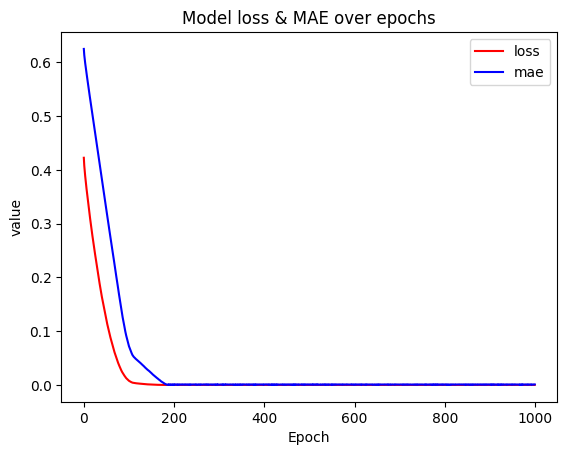

In [79]:
plt.plot(hist.history['loss'], 'r',label='loss')
plt.plot(hist.history['mae'], 'b',label='mae')
plt.legend() # 범례 label추가
plt.xlabel('Epoch')
plt.ylabel('value')
plt.title('Model loss & MAE over epochs')
plt.show()

In [69]:
# 7. 모델 저장 및 사용
# 학습 후 예측
model.predict(np.array([[0],[0.01]])) # 섭씨온도 0, 1도는 화씨온도 몇도

1/1 [==============================] - 0s 35ms/step


array([[0.31956115],
       [0.33755958]], dtype=float32)

In [70]:
model.save("./model/after_learning.h5")

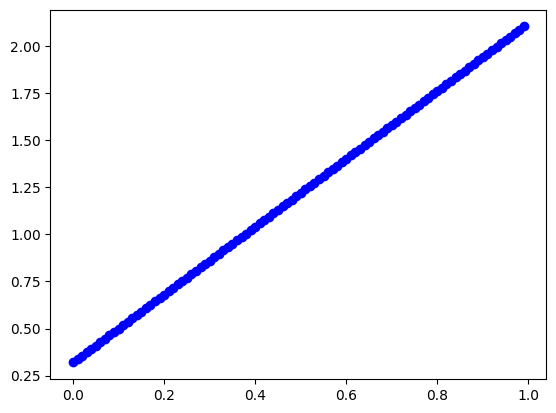

In [77]:
# 실재값
plt.scatter(x=scaled_data_C, y=scaled_data_F, c='b')
plt.show()

In [83]:
# 예측값
y_hat = model.predict([scaled_data_C])
# for h, y in zip(y_hat, scaled_data_F):
#     print('예측값: {}, 실제값 : {}, 오차 : {}'.format(h,y, h[0]-y))

4/4 [==============================] - 0s 4ms/step


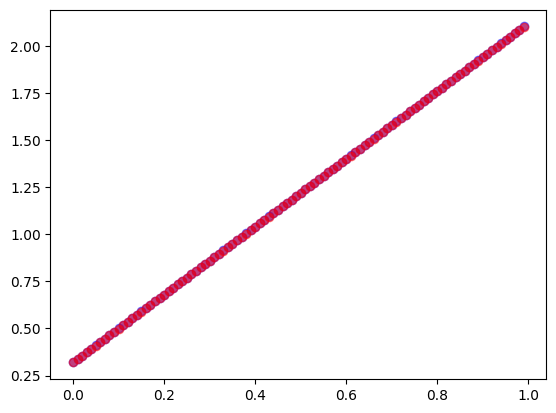

In [81]:
plt.scatter(x=scaled_data_C, y=scaled_data_F, c='b', alpha=0.5) # 투명한 점그래프
plt.scatter(x=scaled_data_C, y=y_hat, c='r', alpha=0.5) # 투명한 점그래프

## 2.2. 노이즈가 있는 데이터로 실습

In [86]:
# 1. 데이터 확보 및 생성
np.random.seed(7)
noise = np.random.normal(0, scale=0.1, size=100) # 평균 0 , 표준편차 0.1개 100개 데이터
noised_scaled_data_F = scaled_data_F + noise

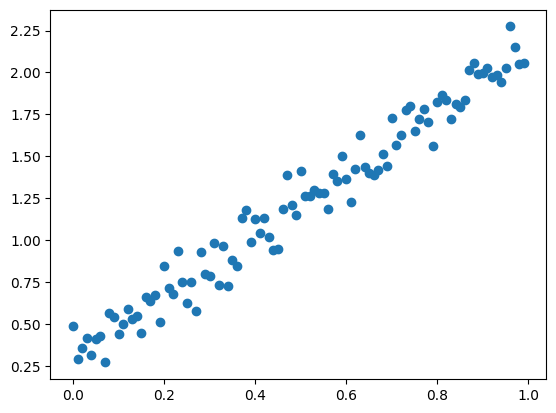

In [87]:
plt.scatter(x=scaled_data_C, y=noised_scaled_data_F)
plt.show()

In [88]:
# 3. 모델구성
model2 = Sequential()
model2.add(Dense(1, input_shape=(1,)))

In [89]:
# 4. 학습과정 설정
model2.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [90]:
# 5. 모델 학습
hist2 = model2.fit(scaled_data_C, noised_scaled_data_F, epochs=1000, verbose=1)

Epoch 1/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.7419 - mae: 0.8032
Epoch 2/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.7227 - mae: 0.7922
Epoch 3/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.7089 - mae: 0.7838
Epoch 4/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6973 - mae: 0.7770
Epoch 5/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.6859 - mae: 0.7702
Epoch 6/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.6755 - mae: 0.7638
Epoch 7/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.6659 - mae: 0.7579
Epoch 8/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.6566 - mae: 0.7522
Epoch 9/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.6474 - mae: 0.7464
Epoch 10/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.6389 - mae: 0.7410
Epoch 11/1000
4/4 [==============================] - 0s 40ms/step -

4/4 [==============================] - 0s 6ms/step - loss: 0.1347 - mae: 0.3047
Epoch 89/1000
4/4 [==============================] - 0s 21ms/step - loss: 0.1309 - mae: 0.2998
Epoch 90/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.1278 - mae: 0.2956
Epoch 91/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1242 - mae: 0.2909
Epoch 92/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.1212 - mae: 0.2873
Epoch 93/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1175 - mae: 0.2821
Epoch 94/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1144 - mae: 0.2780
Epoch 95/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1107 - mae: 0.2730
Epoch 96/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.1078 - mae: 0.2690
Epoch 97/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1050 - mae: 0.2653
Epoch 98/1000
4/4 [==============================] - 0s 5ms/step - loss: 

4/4 [==============================] - 0s 5ms/step - loss: 0.0134 - mae: 0.0923
Epoch 261/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.0133 - mae: 0.0920
Epoch 262/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0132 - mae: 0.0918
Epoch 263/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0132 - mae: 0.0915
Epoch 264/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0132 - mae: 0.0914
Epoch 265/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0131 - mae: 0.0910
Epoch 266/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.0130 - mae: 0.0907
Epoch 267/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.0130 - mae: 0.0904
Epoch 268/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.0129 - mae: 0.0902
Epoch 269/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0129 - mae: 0.0900
Epoch 270/1000
4/4 [==============================] - 0s 4ms/ste

4/4 [==============================] - 0s 7ms/step - loss: 0.0103 - mae: 0.0805
Epoch 433/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.0103 - mae: 0.0806
Epoch 434/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0103 - mae: 0.0803
Epoch 435/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.0103 - mae: 0.0805
Epoch 436/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0103 - mae: 0.0803
Epoch 437/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.0103 - mae: 0.0801
Epoch 438/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.0103 - mae: 0.0801
Epoch 439/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0103 - mae: 0.0802
Epoch 440/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.0103 - mae: 0.0805
Epoch 441/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0103 - mae: 0.0802
Epoch 442/1000
4/4 [==============================] - 0s 8ms/ste

4/4 [==============================] - 0s 5ms/step - loss: 0.0103 - mae: 0.0806
Epoch 605/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0103 - mae: 0.0804
Epoch 606/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.0103 - mae: 0.0805
Epoch 607/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0103 - mae: 0.0805
Epoch 608/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0103 - mae: 0.0805
Epoch 609/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.0103 - mae: 0.0806
Epoch 610/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0103 - mae: 0.0805
Epoch 611/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.0103 - mae: 0.0807
Epoch 612/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.0103 - mae: 0.0807
Epoch 613/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.0103 - mae: 0.0809
Epoch 614/1000
4/4 [==============================] - 0s 7ms/step

4/4 [==============================] - 0s 4ms/step - loss: 0.0103 - mae: 0.0803
Epoch 777/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0103 - mae: 0.0802
Epoch 778/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.0103 - mae: 0.0804
Epoch 779/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0103 - mae: 0.0804
Epoch 780/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.0103 - mae: 0.0806
Epoch 781/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0103 - mae: 0.0806
Epoch 782/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0103 - mae: 0.0805
Epoch 783/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.0103 - mae: 0.0805
Epoch 784/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.0103 - mae: 0.0808
Epoch 785/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0103 - mae: 0.0807
Epoch 786/1000
4/4 [==============================] - 0s 13ms/s

4/4 [==============================] - 0s 6ms/step - loss: 0.0103 - mae: 0.0810
Epoch 949/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0103 - mae: 0.0807
Epoch 950/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0103 - mae: 0.0808
Epoch 951/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0103 - mae: 0.0807
Epoch 952/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0103 - mae: 0.0805
Epoch 953/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0103 - mae: 0.0806
Epoch 954/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0103 - mae: 0.0808
Epoch 955/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0103 - mae: 0.0808
Epoch 956/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0103 - mae: 0.0809
Epoch 957/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0103 - mae: 0.0806
Epoch 958/1000
4/4 [==============================] - 0s 5ms/step

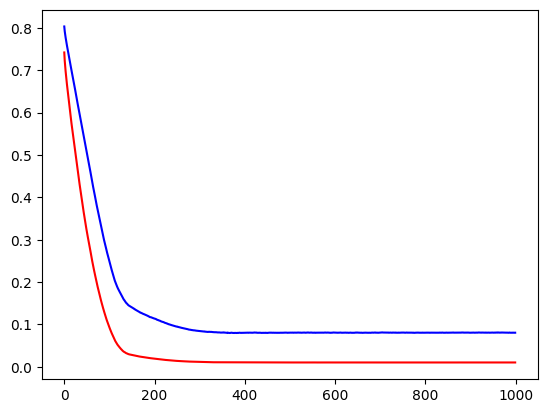

In [92]:
# 6. 학습된 모델과정 살펴보기
plt.plot(hist2.history['loss'], c='r')
plt.plot(hist2.history['mae'], c='b')

In [93]:
model2.save("./model/noise_after_learning.h5")

In [94]:
# 예측값
y_hat = model2.predict([scaled_data_C])

4/4 [==============================] - 0s 2ms/step


In [95]:
for h, y in zip(y_hat, noised_scaled_data_F):
    print('실재값 : {}, 예측값 : {}, 오차 : {}'.format(y, 
                                                       h, 
                                                       h[0]-y))

실재값 : 0.48905257038003563, 예측값 : [0.3048427], 오차 : -0.18420985988504052
실재값 : 0.2914062629459167, 예측값 : [0.32321408], 오차 : 0.0318078209640717
실재값 : 0.3592820163678585, 예측값 : [0.3415855], 오차 : -0.017696529240554426
실재값 : 0.4147516282996508, 예측값 : [0.35995686], 오차 : -0.054794767757353424
실재값 : 0.31310769713742614, 예측값 : [0.37832826], 오차 : 0.06522056662218689
실재값 : 0.4102065572905948, 예측값 : [0.39669967], 오차 : -0.013506890313666087
실재값 : 0.42791096141420687, 예측값 : [0.41507104], 오차 : -0.012839921022284873
실재값 : 0.2705275693654579, 예측값 : [0.4334424], 오차 : 0.16291484444145737
실재값 : 0.5657658005663493, 예측값 : [0.45181382], 오차 : -0.11395198354211833
실재값 : 0.542049851591955, 예측값 : [0.47018522], 오차 : -0.07186463135040833
실재값 : 0.43745710260332404, 예측값 : [0.4885566], 오차 : 0.05109949105321587
실재값 : 0.5008451738804279, 예측값 : [0.50692797], 오차 : 0.0060827931911052735
실재값 : 0.5865299374196752, 예측값 : [0.5252994], 오차 : -0.06123056713082631
실재값 : 0.5278643584808353, 예측값 : [0.5436708], 오차 : 0.01580641502532

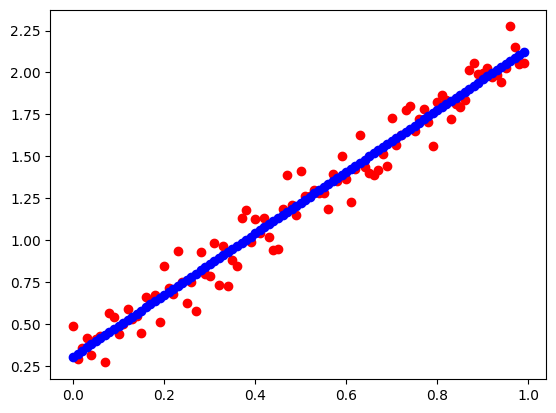

In [100]:
plt.scatter(x=scaled_data_C, 
            y=noised_scaled_data_F,
            c='r')
plt.scatter(x=scaled_data_C, 
            y=y_hat, 
            c='b')

In [ ]:
@01_머신러닝입문-Linear regression.ipynb를 제외한 모든 *.ipynb 파일의 source를 보고, 자세한 설명을 부탁해요. 설명은 입문자가 볼수 있는 내용으로 자세한 설명과 소스에 대한 설명 그리고 참고할수 있는 내용도 같이 해주세요. 설명 파일은 *.md 파일로 만들어 주고, md 파일 이름은 ipymb 의 파일명과 같이 부탁드립니다.   